In [60]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseValue'] = california.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


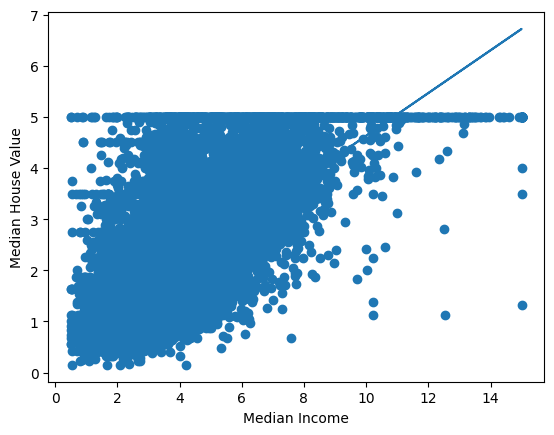

In [61]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[['MedInc']]
y = df['MedHouseValue']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Visualization
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [62]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.5332001304956558
MSE: 0.555891598695244
RMSE: 0.7455813830127761
R2 Score: 0.5757877060324511


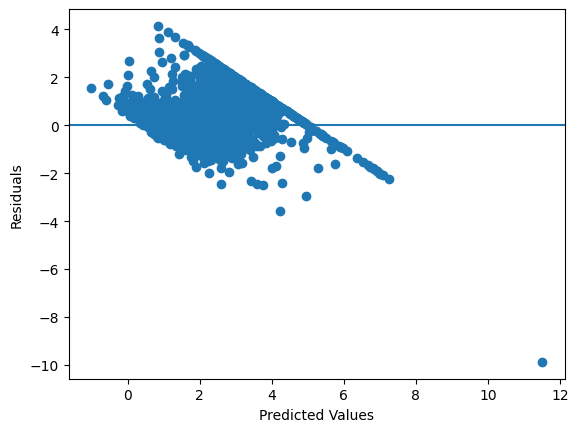

In [64]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [65]:
# new_data must contain 8 values to match the California Housing features
# Example: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Lat, Long]
new_house = [[8.3252, 41, 6.984, 1.023, 322, 2.555, 37.88, -122.23]]
predicted_price = model.predict(new_house)

print("Predicted House Value:", predicted_price)


Predicted House Value: [4.15132633]


c:\Users\SM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
